# Crear la clase  Target

## Ejercicio 1

Cree el archivo competencia_01.csv, usando el competencia_01_crudo.csv con una variable adicional llamada clase_ternaria, que contenga las categorías **CONTINUA, BAJA+1 y BAJA+2**

Ayudita
Para practicar el muy útil y necesario lenguaje **SQL**, vamos a utilizar una base de datos **OLAP** llamada **DuckDB**.

La documentación la puede encontrar [aquí](https://duckdb.org/docs/archive/0.8.1/sql/introduction) Procedemos a instalarla, esto se debe ejecutar una sola vez

In [1]:
!pip install duckdb
!pip install jupysql
!pip install duckdb-engine


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Configuramos el entorno de ejecución. Si ya tiene todo instalado, solo necesita ejecutar esta celda para empezar a usar **duckdb**

In [2]:
import duckdb
import pandas as pd

%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False



In [3]:
%sql duckdb:///database.duckdb

Y ya podemos usar **SQL** dentro de una notebook!

In [4]:
%%sql
select 'hola mundo'

,'hola mundo'
0,hola mundo


Para cargar el archivo `.csv` a una tabla pasando su ubicación a través de la variable `dataset_path`:

In [5]:
dataset_path = 'C:/Users/Usuario/Downloads/'
dataset_file = 'competencia_01_crudo.csv'

In [6]:
%%sql
create or replace table competencia_01_crudo as
select
    *
from read_csv_auto("{{dataset_path + dataset_file}}")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


Hagamos unas queries básicas para comprobar que todo esta funcionando bien.

In [7]:
%sql select * from competencia_01_crudo

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
0,249221109,202101,1,0,0,61,300,1664.94,17994.40,1605.81,...,0.0,4.0,0.0,-37098.90,0.0,7867.0,118514.88,10.0,0.0,76538.25
1,249221468,202101,1,0,0,53,37,4879.78,18640.95,1149.08,...,0.0,4.0,0.0,-9864.93,0.0,1124.0,31427.14,14.0,0.0,0.00
2,249223005,202101,1,0,0,48,202,1828.35,37789.01,610.12,...,0.0,4.0,0.0,-32119.08,0.0,3486.0,855.11,2.0,0.0,19389.69
3,249228180,202101,1,0,0,66,320,175.87,2600.67,276.22,...,0.0,4.0,0.0,-10891.30,0.0,8925.0,7517.73,6.0,0.0,516.12
4,249232117,202101,1,0,0,79,373,16600.69,32270.07,16367.13,...,0.0,4.0,0.0,-43610.75,0.0,8607.0,37309.25,5.0,0.0,3084.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981941,1598444941,202106,0,0,0,27,1,0.00,0.00,0.00,...,NaN,NaN,0.0,NaN,NaN,15.0,NaN,NaN,NaN,0.00
981942,1598471047,202106,1,0,0,28,1,95.20,95.20,0.00,...,NaN,7.0,0.0,NaN,NaN,14.0,NaN,NaN,NaN,0.00
981943,1598515897,202106,0,0,0,30,1,72.08,72.08,0.00,...,NaN,7.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,0.00
981944,1598517059,202106,0,0,0,24,1,0.00,0.00,0.00,...,NaN,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.00


In [ ]:
UPDATE competencia_01_crudo
SET mi_columna = NULL
WHERE mi_columna = 'NaN';

In [8]:
%%sql
-- Selecciona las filas con numero_de_cliente repetido en la tabla competencia_01_crudo
SELECT *
FROM competencia_01_crudo
WHERE numero_de_cliente IN (
    SELECT numero_de_cliente
    FROM competencia_01_crudo
    GROUP BY numero_de_cliente
    HAVING COUNT(*) > 1
)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
0,301268134,202103,1,0,0,50,322,26322.14,118447.18,1319.62,...,0.0,7.0,0.00,-67236.36,0.0,5221.0,50168.68,49.0,5.0,69019.32
1,301272583,202103,1,0,0,59,322,2015.63,19569.12,2010.69,...,0.0,7.0,0.00,-18660.33,0.0,7440.0,19730.69,13.0,0.0,1020.51
2,301274914,202103,1,0,0,68,133,1664.39,-3524.50,2305.61,...,0.0,1.0,0.00,-10325.59,0.0,3810.0,457.47,1.0,0.0,3038.07
3,301280892,202103,1,0,0,46,182,6391.98,50678.79,1904.15,...,0.0,7.0,13085.94,-12558.11,0.0,4704.0,1977.16,4.0,0.0,1313.76
4,301282429,202103,1,0,0,51,184,1925.65,18761.07,1592.20,...,NaN,1.0,0.00,NaN,NaN,5589.0,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979854,1595206614,202106,1,0,0,31,2,237.47,237.50,37.25,...,0.0,0.0,0.00,0.00,0.0,41.0,3192.89,1.0,0.0,0.00
979855,1595462216,202106,1,0,0,33,2,393.94,419.10,108.71,...,NaN,0.0,0.00,NaN,NaN,50.0,NaN,NaN,NaN,0.00
979856,1595487084,202106,1,0,0,42,2,1.20,1.68,0.00,...,NaN,21.0,0.00,NaN,NaN,42.0,NaN,NaN,NaN,0.00
979857,1595532012,202106,1,0,0,39,2,187.96,187.96,43.08,...,NaN,0.0,0.00,NaN,NaN,36.0,NaN,NaN,NaN,0.00


In [34]:
%%sql
select
    foto_mes
    , count(*) as cantidad -- cuenta cuantos casos hay en cada foto_mes
                           -- y lo guarda en un campo llamado cantidad
from competencia_01_crudo
group by foto_mes

,foto_mes,cantidad
0,202101,162026
1,202102,162646
2,202103,163685
3,202104,164090
4,202105,164623
5,202106,164876


Perfecto, ahora cree una nueva tabla con la variable adicional que se le pide.

In [47]:
%%sql
CREATE OR REPLACE TABLE competencia_01 AS
with periodos as (
    select distinct foto_mes from competencia_01_crudo),
    clientes as (
        select distinct numero_de_cliente from competencia_01_crudo
    ),
    todo as (
     select numero_de_cliente, foto_mes from clientes cross join periodos),
     clase_ternaria as (
        select
            c.*,
            if(c.numero_de_cliente is null, 0,1) as mes_0,
            lead(mes_0, 1) over (partition by c.numero_de_cliente order by c.foto_mes) as mes_1,
            lead(mes_0, 2) over (partition by c.numero_de_cliente order by c.foto_mes) as mes_2,
            case
                when mes_0 = 0 and mes_1 = 0 and mes_2 = 0 then null
                when mes_2 = 1 then 'CONTINUA'
                when mes_1 = 1 and mes_2= 0 then 'BAJA+2'
                else 'BAJA+1'
            end as clase_ternaria
        from todo t 
        left join competencia_01_crudo c using(numero_de_cliente, foto_mes)
     ) select
        * 
    from clase_ternaria
    Where mes_0 = 1   

,Success


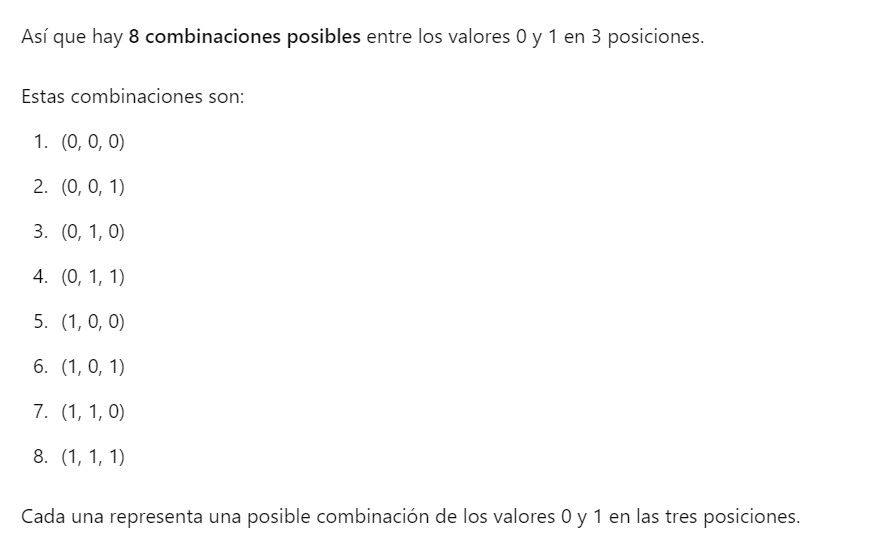

In [55]:
%%sql select * 
from competencia_01
where clase_ternaria = 'BAJA+2'

# Logrado


,numero_de_cliente,foto_mes,mes_0,mes_1,mes_2,clase_ternaria
0,250480925,202105,1,1,0,BAJA+2
1,251114514,202105,1,1,0,BAJA+2
2,251212166,202105,1,1,0,BAJA+2
3,251320893,202105,1,1,0,BAJA+2
4,252081382,202105,1,1,0,BAJA+2
...,...,...,...,...,...,...
167398,1536866565,202105,1,1,0,BAJA+2
167399,1543871795,202105,1,1,0,BAJA+2
167400,1550951482,202105,1,1,0,BAJA+2
167401,1587382261,202105,1,1,0,BAJA+2


In [24]:
%%sql
SELECT *
FROM competencia_02


,numero_de_cliente,clase
0,249228180,CONTINUA
1,249239632,CONTINUA
2,249261075,CONTINUA
3,249267267,CONTINUA
4,249270768,CONTINUA
...,...,...
169476,1598197638,CONTINUA
169477,1598198296,CONTINUA
169478,1598206246,CONTINUA
169479,1598471047,CONTINUA


## Ejercicio 1.1
* ¿Cuál es la nominalidad de cada clase?


In [13]:
%%sql
PIVOT competencia_01
on clase_ternaria
USING count(numero_de_cliente)
GROUP BY foto_mes

,foto_mes,CONTINUA
0,202101,160615
1,202102,160853
2,202103,161689
3,202104,161914
4,202105,0
5,202106,0


* ¿Cuál es la proporción del target?

## Guardar tabla en .csv

Para guardar a un `.csv` simplemente debe ejecutar la siguiente sentencia

In [14]:
%%sql 
COPY competencia_01 TO '{{dataset_path}}competencia_01.csv' (FORMAT CSV, HEADER)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success
